# **Wrangle and Analyze Data (WeRateDogs Twitter page)**

*Author : Sahand Niasti*

![Image](https://i.ibb.co/JFLyL8w/We-Rate-Dogs.png)

# 1- Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter for breaking these aforementioned laws [Wikipedia].

Our main goal here is to separate a portion of these tweets to wrangle and analyze data. For this purpose, WeRateDogs led Udacity to have access to its archive tweets with some basic data (such as tweet id, timestamp, replies, retweets and etc.).
As I said before, our sole aim here is to practice wrangling data with WeRateDogs Twitter data and create enjoyable and meaningful analyzing at the end of the report. There are different steps toward us during the project that will be introduced and explain thoroughly.

- Data Gathering: first step of data wrangling, aiming to gather data from 3 different sources here.
- Data Assessment: dive deep into tables and data to find any anomaly or misinterpretation in data.
- Data Cleaning: carry out three main step (define, code, test) of cleaning data to be ready for analysis.



In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy

# 2- Data Gathering

## Source 1: The WeRateDogs Twitter archive

At first, i have downloaded the archived csv-format tweets of WeRateDogs from the Udacity and imported as a Pandas dataframe.

In [2]:
# Loads Twitter archive
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Source 2: Tweet image predictions

A link to this file is available. All we need to do is to get the file via requests library and save it as a separate file. then, like previous step, we import the dataset via pandas dataframe.  

In [3]:
#request the dataset
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#save file 
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#load image prediction dataset
df_predict = pd.read_csv('image-predictions.tsv', sep="\t")
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Source 3: Additional Twitter data via Twitter API 

Twitter give us access to its database through api’s.So, the tweet id’s required to be downloaded was selected and requested from twitter api. 

In [4]:
# open tweets and read each line to extract required information
with open('tweet-json.txt',mode='r') as tweets:
    tweets = tweets.readlines()
    
tweets_json = []
for tweet_line in tweets:
    tweet_info = []
    json_tweet = json.loads(tweet_line)
    tweet_info.append(json_tweet['id'])
    tweet_info.append(json_tweet['favorite_count'])
    tweet_info.append(json_tweet['retweet_count'])
    tweet_info.append(json_tweet['display_text_range'][1])
    
    tweets_json.append(tweet_info)
    
#define a new dataframe
df_api = pd.DataFrame(tweets_json,columns = ["tweet_id",'favorite_count','retweet_count','num_characters'])
df_api.head()

,tweet_id,favorite_count,retweet_count,num_characters
0,892420643555336193,39467,8853,85
1,892177421306343426,33819,6514,138
2,891815181378084864,25461,4328,121
3,891689557279858688,42908,8964,79
4,891327558926688256,41048,9774,138


# 3- Data Assessment

## 3-1- df_archive

#### 3-1-1 General view

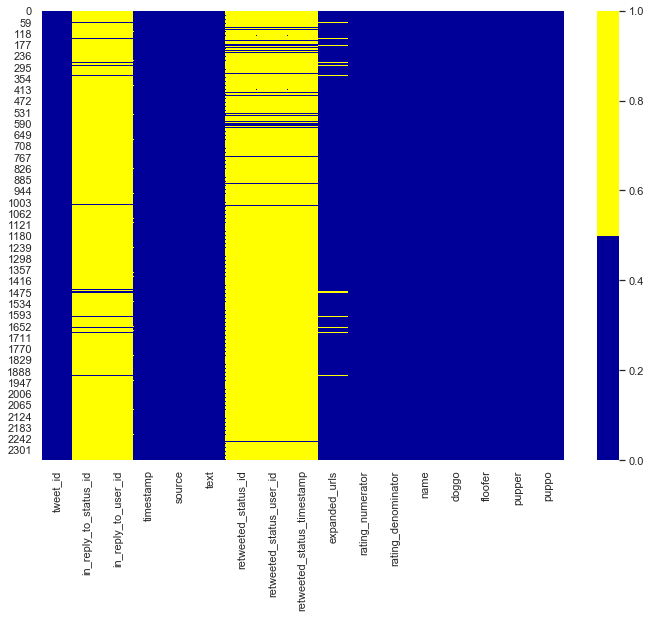

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing.
sns.heatmap(df_archive.isnull(), cmap=sns.color_palette(colours))

Almost all data related to reply and retweets are missing. to have more accurate data, we can see info below

In [6]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

It can be seen that there are two main type problem here.
 - tweet_id should be string
 - timestamp should be date format

In [7]:
df_archive.describe(include='object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,2017-06-09 16:22:42 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


- there are 4 unique source out of 2356 tweets
- some expanded urls are missed 
- many categorised dogs contain 'None' value. So, it is almost impossible to group them based on these categorisation

In [8]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- No missing value in tweet_id.
- the average rating numerator is 13.2, which is higher than 10 and shows that many rating values are higher than 10. we can also see that there is a 1776 rate in this column which need to be investigated
- rating denominator should be 10 but there is a 170 value

#### 3-1-2 Detail view

In [9]:
# dog classification
for dog_type in df_archive.columns[13:]:
    print('----------{}----------'.format(dog_type))
    print(df_archive[dog_type].value_counts())
    print('\n')

----------doggo----------
None     2259
doggo      97
Name: doggo, dtype: int64


----------floofer----------
None       2346
floofer      10
Name: floofer, dtype: int64


----------pupper----------
None      2099
pupper     257
Name: pupper, dtype: int64


----------puppo----------
None     2326
puppo      30
Name: puppo, dtype: int64




It is clear that many dog classification values are empty(None).

In [10]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Loomis        1
Callie        1
Billy         1
Cilantro      1
Mitch         1
Name: name, Length: 957, dtype: int64

as we can see, there is a name "a" among dog's names. so, there must be other names that are incorrect.

In [11]:
df_archive[df_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


No duplicated value. So, as we said before, tweet_id can bes used as the length of our dataframe.

In [12]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- majority of ratings are between 10 to 13
- then the poplular ratings are below 10
- and the rest of numerators are greater than 14. we can see 402,1776 and more odd rates.

There is no problem with this ratings as many people like to show their love by give rates more than 10.

In [13]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

As we could expect, the majority of rating denominators are 10. but there must be something wrong with others. let's check them.

In [14]:
for i in df_archive[df_archive['rating_denominator'] != 10 ].text:
    print('---------------------')
    print(i)

---------------------
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
---------------------
@docmisterio account started on 11/15/15
---------------------
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
---------------------
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
---------------------
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
---------------------
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
---------------------
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
---------------------
Say hello to this unbelievably well behaved squad of do

It is clear that there are some misunderstanding from the text. Multiple Dogs or multiple occurences of the pattern \d+\/\d+.

## 3-2- df_predict

#### 3-2-1 General view

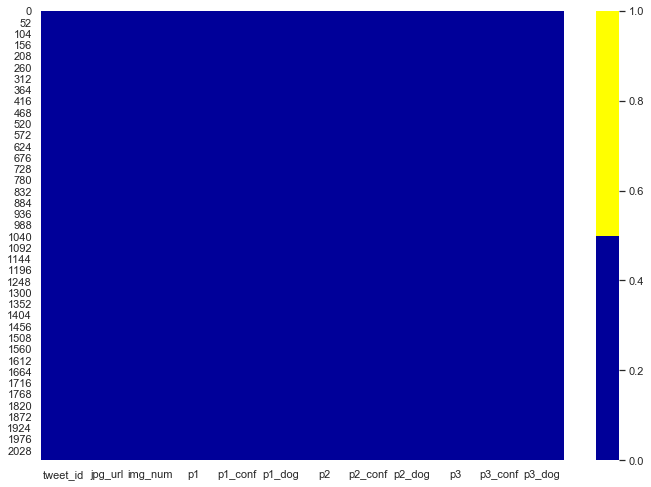

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
colours = ['#000099','#ffff00' ] # specify the colours - yellow is missing.
sns.heatmap(df_predict.isnull(), cmap=sns.color_palette(colours),vmin = 0, vmax = 1)

No missing values

In [16]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
1890,848690551926992896,https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg,1,flat-coated_retriever,0.823648,True,Newfoundland,0.100571,True,groenendael,0.038310,True


- Lowercase and uppercase predictions
- There are some pictures with no prediction

In [18]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- most of the tweet id's have one picture except some of them, that have 4 images
- there is a prediction with 100% accuracy

In [19]:
df_predict.describe(include='object')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


only 2009 out of 2075 image urls are unique. so, there must be repetition or retweets.

In [21]:
df_predict[df_predict.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There is no duplication in this dataframe. so, the tweet id is unique.

#### 3-2-2 Detail view

In [22]:
df_predict.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg    2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg    2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg    2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg    2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg    2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg    2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg    2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg    2
Name: jpg_url, dtype: int64

As predicted - this data contains retweets. Let's check on of them to gain a better understanding

In [23]:
df_predict[df_predict['jpg_url']=='https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True


In [24]:
df_archive[(df_archive['tweet_id']== 769940425801170949) |(df_archive['tweet_id']== 832040443403784192)]
    

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None
824,769940425801170949,NaN,NaN,2016-08-28 16:51:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klein. These pics were taken a month a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None


Let's see if there are pictures, for which the ML - Algorithm didn't predict any dogs.

In [25]:
print(df_predict[(df_predict['p1_dog']== False)&(df_predict['p2_dog']== False)&(df_predict['p3_dog']== False)].shape)
df_predict[(df_predict['p1_dog']== False)&(df_predict['p2_dog']== False)&(df_predict['p3_dog']== False)].head()

(324, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


There are 324 dog picture with no dog picture at all. but there must be some prediction in latter levels (p2 and p3). let's check them.

In [26]:
print(df_predict[(df_predict['p1_dog']== False)&((df_predict['p2_dog']== True)|(df_predict['p3_dog']== True))].shape)
df_predict[(df_predict['p1_dog']== False)&((df_predict['p2_dog']== True)|(df_predict['p3_dog']== True))].head()

(219, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False


More than 200 dogs did not predict at first but in second or third level were predicted

In [27]:
# Observes predictions
for i in df_predict[['p1_dog','p2_dog','p3_dog']]:
    print('----------{}----------'.format(i))
    print(df_predict[i].value_counts())
    print('\n')


----------p1_dog----------
True     1532
False     543
Name: p1_dog, dtype: int64


----------p2_dog----------
True     1553
False     522
Name: p2_dog, dtype: int64


----------p3_dog----------
True     1499
False     576
Name: p3_dog, dtype: int64




As we can see, just around a third quarter of predictions were successful

## 3-3- df_api

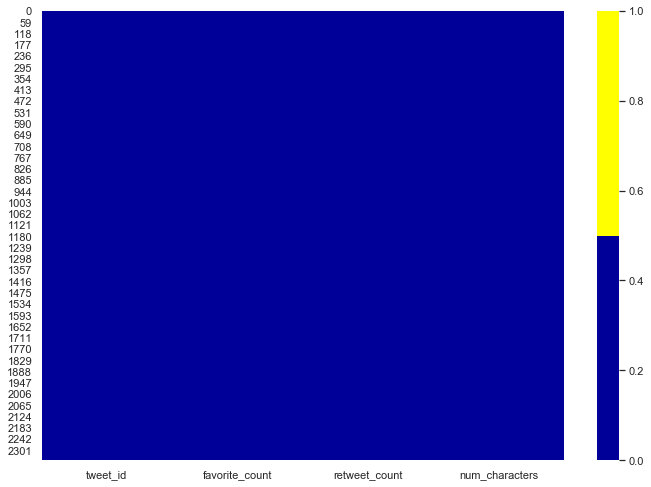

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
colours = ['#000099','#ffff00' ] # specify the colours - yellow is missing.
sns.heatmap(df_api.isnull(), cmap=sns.color_palette(colours),vmin = 0, vmax = 1)

In [29]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
 3   num_characters  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [30]:
df_api.describe()

,tweet_id,favorite_count,retweet_count,num_characters
count,2.354000e+03,2354.000000,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366,111.202209
std,6.852812e+16,11814.771334,5284.770364,27.364407
min,6.660209e+17,0.000000,0.000000,11.000000
25%,6.783975e+17,1415.000000,624.500000,93.000000
50%,7.194596e+17,3603.500000,1473.500000,116.000000
75%,7.993058e+17,10122.250000,3652.000000,137.000000
max,8.924206e+17,132810.000000,79515.000000,165.000000


I cannot find any dirty or messy data in this dataset.

## 3-4- Summory

### 3-4-1 Quality

#### 3-4-1-1 df_archive table

- Dog names are not complete and there are some unrelated words(a,...)
- contains retweets
- the source column contains html code
- data type of tweet_id and timestamp need to be changed
- some of the dogs are not classified as one of "doggo", "floofer", "pupper" or "puppo" and contain all "None" instead
- some of the ratings are not correctly extracted

#### 3-4-1-2 df_predict table
- the datatype of the id - columns is integer and should be str
- contains retweets (duplicated rows in column jpg_url)
- there are pictures in this table that are not dogs
- the predictions are sometimes uppercase, sometimes lowercase

#### 3-4-1-3 df_api
- None

### 3-4-2 Tidiness

#### 3-4-2-1 df_archive table
- One column for Dog classification(doggo, floofer, pupper or puppo)
- unecessary source column with hardly readable information

#### 3-4-2-2 df_predict
- the prediction and confidence columns should be reduced to two columns - one for the prediction with the highest confidence (dog)

#### 3-4-2-3df_api table
- None

# 4- Cleaning

Cleaning of this data was done in 8 consecutive steps.
1.	Merging Tables 
2.	Dropping unnecessary columns
3.	Cleaning data types
4.	Extracting the source from html code
5.	Removing the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column
6.	Removing the wrong names of name column
7.	Summarizing the prediction columns into breed and conf
8.	making dog breed column lowercase


### 4-1- Merging Tables

I could clean all the tables one by one, but all of them share some cleaning needs or are dependent on each other to do so (for example removing of retweets or pictures not containig dogs). By merging them all together as first step, I can save some coding time and avoid repetition.

In [73]:

#outer join to not loose rows at first
df_master = pd.merge(df_archive, df_api, on = "tweet_id", how = "outer")
df_master = pd.merge(df_master, df_predict, on = "tweet_id", how = "outer")

#creating a copy
df_master_clean = df_master.copy()

df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 4-2- Dropping unnecessary columns

In this section, we aim to drop columns related to reply,retweets and tweets which do not have dog pictures, because it won't help us in data analysis.At first, let's look at a total view of dataset with valid and invalid values.

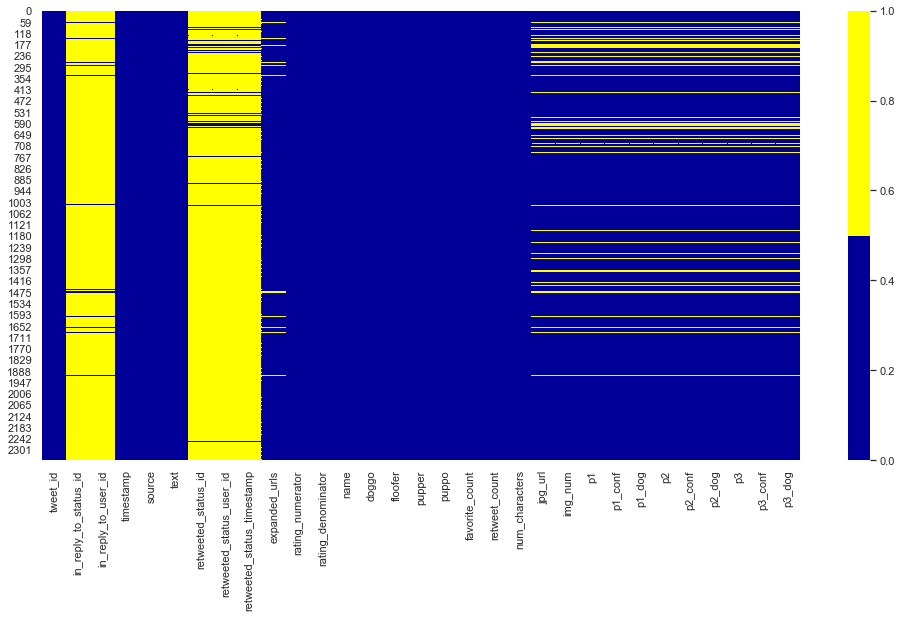

In [74]:
sns.set(rc={'figure.figsize':(17,8.27)})
colours = ['#000099','#ffff00' ] # specify the colours - yellow is missing.
sns.heatmap(df_master_clean.isnull(), cmap=sns.color_palette(colours),vmin = 0, vmax = 1)

In [75]:
#we only want the rows without an entry in "retweeted_status_id" in our master dataframe
df_master_clean = df_master_clean[df_master_clean["retweeted_status_id"].isnull()]

In [76]:
#check with the column from the api table, no retweets left
df_master_clean.shape

(2175, 31)

In [77]:
#same as for the retweets, we only want the rows without an entry in "in_reply_to_status_id"
df_master_clean = df_master_clean[df_master_clean.in_reply_to_status_id.isnull()]

In [78]:

#drop the unneeded columns
df_master_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

In [79]:
df_master_clean.dropna(subset = ["jpg_url"], inplace = True)

In [80]:

#check if there are still duplicated images after dropping the replies and the retweets
sum(df_master_clean.jpg_url.duplicated())

0

In [81]:
df_master_clean.drop(df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

In [82]:
df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [83]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1666 non-null   int64  
 1   timestamp           1666 non-null   object 
 2   source              1666 non-null   object 
 3   text                1666 non-null   object 
 4   expanded_urls       1666 non-null   object 
 5   rating_numerator    1666 non-null   int64  
 6   rating_denominator  1666 non-null   int64  
 7   name                1666 non-null   object 
 8   doggo               1666 non-null   object 
 9   floofer             1666 non-null   object 
 10  pupper              1666 non-null   object 
 11  puppo               1666 non-null   object 
 12  favorite_count      1666 non-null   float64
 13  retweet_count       1666 non-null   float64
 14  num_characters      1666 non-null   float64
 15  jpg_url             1666 non-null   object 
 16  img_nu

### 4-3- Cleaning  data types

In [84]:
#transform the timestamp to datetime
df_master_clean["timestamp"] = pd.to_datetime(df_master_clean.timestamp)

for x in ["retweet_count", "favorite_count", "img_num","num_characters"]:
    df_master_clean[x] = df_master_clean[x].astype("int64")
    

df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   object             
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   int64              
 6   rating_denominator  1666 non-null   int64              
 7   name                1666 non-null   object             
 8   doggo               1666 non-null   object             
 9   floofer             1666 non-null   object             
 10  pupper              1666 non-null   object             
 11  puppo               1666 non-null   object             
 12  favorite_count      1666 non-null 

### 4-4-  Extract the source from html code
Right now the source column is not giving us any useful information while looking at it. Because the relevant information is always between two "> <", the information will be easy to extract

In [85]:

df_master_clean.source.head(2)

1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [86]:
#https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions
df_master_clean.source = df_master_clean.source.str.extract("\>(.*?)\<", expand = True)

In [87]:
df_master_clean.source.value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

### 4-5- Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column

We want to reduce the columns into one for an easier analysis. For that we have to remove the None with "" at first to concat the columns together and afterswards with np.nan, so we could easily exclude these rows from a specific analysis.

In [88]:
#replace "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_master_clean[x].replace("None", "", inplace = True)

#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
#concat the columns together
df_master_clean['dog_class'] = df_master_clean['doggo'].map(str) + df_master_clean[
    'floofer'].map(str) + df_master_clean['pupper'].map(str) + df_master_clean['puppo'].map(str)

df_master_clean.dog_class.value_counts()

                1409
pupper           166
doggo             54
puppo             21
floofer            7
doggopupper        7
doggopuppo         1
doggofloofer       1
Name: dog_class, dtype: int64

As we can see, there are some mix type of dogs that we need to choose which of them are true.because there are only 9 mixed class, we can see the tweets manually to check which one is true.

In [89]:

pd.set_option('display.max_colwidth', 150)
df_master_clean[(df_master_clean['dog_class']=='doggopupper')|(df_master_clean['dog_class']=='doggopuppo')|(df_master_clean['dog_class']=='doggofloofer')][['text','dog_class']]

,text,dog_class
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.c...,doggopuppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https...",doggofloofer
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https...",doggopupper
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper


In [90]:
#191 puppo
#200 floofer
#460 pupper
#531 two dogs
#575 pupper
#889 two dogs
#956 not classified by author
#1063 two dogs
#1113 two dogs

df_master_clean.loc[191, "dog_class"] = "puppo"
df_master_clean.loc[200, "dog_class"] = "floofer"
df_master_clean.loc[460, "dog_class"] = "pupper"
df_master_clean.loc[531, "dog_class"] = np.nan
df_master_clean.loc[575, "dog_class"] = "pupper"
df_master_clean.loc[889, "dog_class"] = np.nan
df_master_clean.loc[956, "dog_class"] = np.nan
df_master_clean.loc[1063, "dog_class"] = np.nan
df_master_clean.loc[1113, "dog_class"] = np.nan

In [91]:
#drop the columns out
df_master_clean.drop(["doggo", "floofer", "pupper", "puppo"], inplace = True, axis = 1)

### 4-6- Remove the wrong names of name column

Here we will also replace the wrong names with np.nan

In [92]:
df_master_clean["name"].tail()

2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, dtype: object

In [93]:
df_master_clean[df_master_clean["name"] == 'the']['name']

1527    the
1603    the
1797    the
1815    the
2037    the
2345    the
2346    the
Name: name, dtype: object

In [94]:
#replace the none names with NaN
for x in ["None", "a", "the"]:
    df_master_clean["name"].replace(x, np.nan, inplace = True)

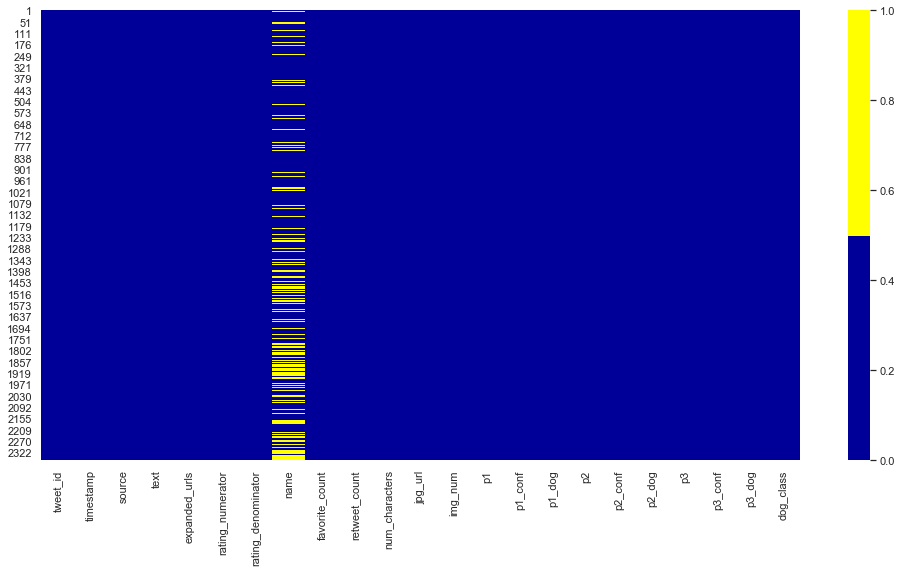

In [95]:
sns.set(rc={'figure.figsize':(17,8.27)})
colours = ['#000099','#ffff00' ] # specify the colours - yellow is missing.
sns.heatmap(df_master_clean.isnull(), cmap=sns.color_palette(colours),vmin = 0, vmax = 1)

### 4-7- Reduce the prediction columns into  breed and conf

In the next step we want to reduce the prediction columns into two - breed and confidence. The columns are already sorted by confidence. We will take the most likely prediction for each row which is supposed to be a dog.

In [96]:
#extract the most likely prediction which is a dog
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_master_clean["breed"] = df_master_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_master_clean["conf"] = df_master_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [97]:
#drop the reduced columns
df_master_clean.drop(df_master_clean.columns[13:22], inplace = True, axis = 1)

### 4-8- make all dog breed column lowercase

In [98]:
#lower the strings
df_master_clean.breed = df_master_clean.breed.str.lower()

In [99]:
#reset index to match with the real amount of rows
df_master_clean.reset_index(drop = True, inplace = True)

In [100]:
df_master_clean.shape

(1666, 16)

In [101]:

#save the data to a *.csv file
df_master_clean.to_csv('twitter_archive_master.csv', index = False)

# 5- Analyzing and Visualizing Data

## 5-1- Popularity of dog breeds

In [102]:
#read in the cleaned csv
df = pd.read_csv("twitter_archive_master.csv")

In [103]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,num_characters,jpg_url,img_num,dog_class,breed,conf
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,33819,6514,138,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,25461,4328,121,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,42908,8964,79,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,41048,9774,138,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,20562,3261,138,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,NaN,chesapeake_bay_retriever,0.425595


In [104]:
#group dog breed based on favorite and retweet count
df_breed_group = df[["retweet_count", "favorite_count", "breed"]].groupby("breed", as_index = False).sum()

#group dog breed based on tweet id
df_breed_count = df.breed.value_counts().to_frame()
df_breed_count.reset_index(inplace = True)
df_breed_count.rename(columns = {'breed':'breed_popularity','index':'breed'},inplace = True)

#merge table above
df_breed_merged = df_breed_group.merge(df_breed_count,left_on = 'breed',right_on = 'breed')

#sort merged table based on favorites
df_breed_merged.sort_values("retweet_count", ascending = False).head(10)

,breed,retweet_count,favorite_count,breed_popularity
45,golden_retriever,586657,1943782,156
62,labrador_retriever,405404,1265355,106
80,pembroke,291771,1038797,94
27,chihuahua,250722,743689,90
88,samoyed,203446,583906,42
41,french_bulldog,156230,570921,31
30,cocker_spaniel,145743,407412,30
28,chow,131025,446933,48
82,pug,118682,383817,62
103,toy_poodle,115330,337270,50


I analyzed the relationship between the numbers of favorite and retweet and dog breeds to find out which dog breeds are the most beloved by the users. I used the most relevant results of the machine learning values, categorized the dog breeds based on pictures. According to my results, golden retrivers are the all time favorites among the users with more than 1900000 favorites, the second and third breeds are labrador retrievers (about 1100000 favorites) and pembrokes (about 1000000 favorites).

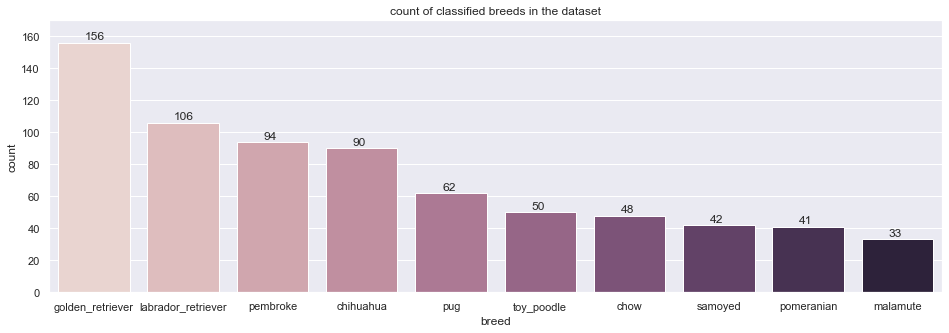

In [118]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "breed", data = df, order=df.breed.value_counts().iloc[:10].index, palette = sns.color_palette(sns.cubehelix_palette(10)))
ax.set_title("count of classified breeds in the dataset");

ax.set_ylim(0, 170)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

Untill now, we have calculated the sum value of retweets and favorite counts.but now,we want to compare single tweets.

In [106]:
df_single = df[["retweet_count", "favorite_count", "breed"]].sort_values("retweet_count", ascending = False)


,retweet_count,favorite_count,breed
686,79515,131075,labrador_retriever
360,56625,107015,chihuahua
714,52360,75163,eskimo_dog
275,48265,132810,lakeland_terrier
53,45849,107956,english_springer


In [107]:
df[["retweet_count", "favorite_count", "breed"]].sort_values("favorite_count", ascending = False).head(5)

,retweet_count,favorite_count,breed
275,48265,132810,lakeland_terrier
686,79515,131075,labrador_retriever
53,45849,107956,english_springer
360,56625,107015,chihuahua
100,32883,106827,french_bulldog


In [119]:
df_single = df[["retweet_count", "favorite_count", "breed"]]
df_single['Total'] = df_single['retweet_count'] + df_single['favorite_count']
df_single.sort_values("Total", ascending = False).head(5)

C:\Users\Sahand\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,retweet_count,favorite_count,breed,Total
686,79515,131075,labrador_retriever,210590
275,48265,132810,lakeland_terrier,181075
360,56625,107015,chihuahua,163640
53,45849,107956,english_springer,153805
100,32883,106827,french_bulldog,139710


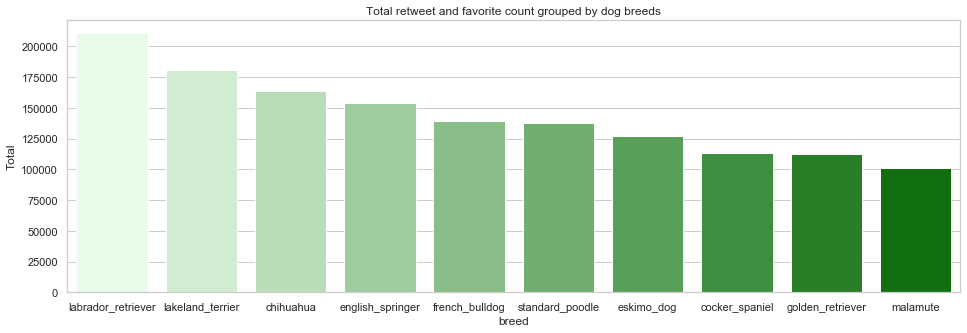

In [134]:
fig, ax = plt.subplots(figsize = (16,5))
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="breed", y="Total", data=df_single.sort_values("Total", ascending = False).head(10),palette = sns.light_palette("green",10))
ax.set_title("Total retweet and favorite count grouped by dog breeds");


We can see that the most liked and retweeted tweet is in fact a labrador retriever, with golden retrievers not even being in the list.

In [108]:

df_breed_group_mean = df[["rating_numerator", "breed"]].groupby("breed", as_index = False).mean()
df_breed_group_mean.sort_values("rating_numerator", ascending = False).head(10)

,breed,rating_numerator
29,clumber,27.000000
96,soft-coated_wheaten_terrier,21.357143
109,west_highland_white_terrier,14.687500
48,great_pyrenees,14.666667
28,chow,14.166667
62,labrador_retriever,13.688679
16,borzoi,13.600000
94,siberian_husky,13.250000
18,bouvier_des_flandres,13.000000
81,pomeranian,12.536585


### 5-2- Tweets per day

Now is the time to see which days of the week users of WeRateDogs make more comments and retweets. 

In [109]:

df_time = df.copy()
df_time.timestamp = pd.to_datetime(df_time.timestamp)
df_time["dow"] = df_time["timestamp"].apply(lambda x: x.dayofweek)

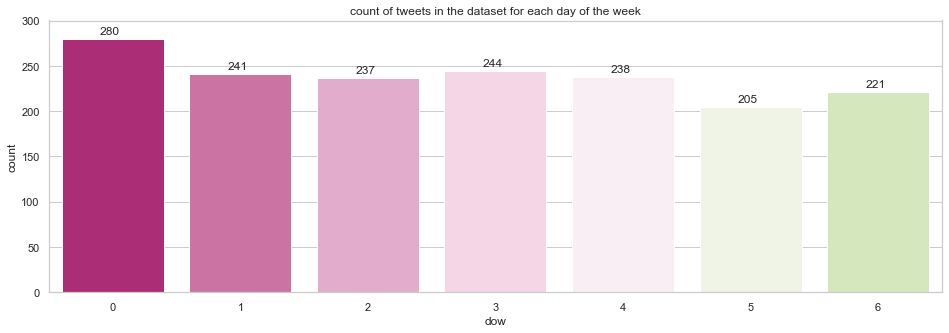

In [133]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "dow", data = df_time, palette =sns.color_palette("PiYG", 10))
ax.set_title("count of tweets in the dataset for each day of the week");

ax.set_ylim(0, 300)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

By looking at bar chart above, it is clear that first day of the week is the most common day which users tweet during a week. As we arrive the weekend, tweets per day reduced until Sunday.

### 5-3- Dog Stages

I analyzed the specific "dog stages", excluding the missing values to make a pie chart about the proportions of the categories. The most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%). The account owners use the words puppo and floofer in 10% of the cases alltogether.

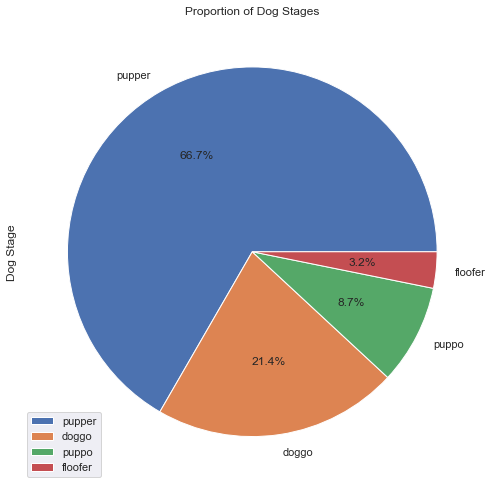

In [111]:
fig, ax = plt.subplots(figsize=(8.5,8.5))
df['dog_class'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

### 5-4- Most Popular Dog Names on the Account

I would like to find the most popular dog names. As rating has not anything to do with popularity, in this case, I will rate popularity by the number of tweets, assuming that the most popular dog names occur more times on the site.



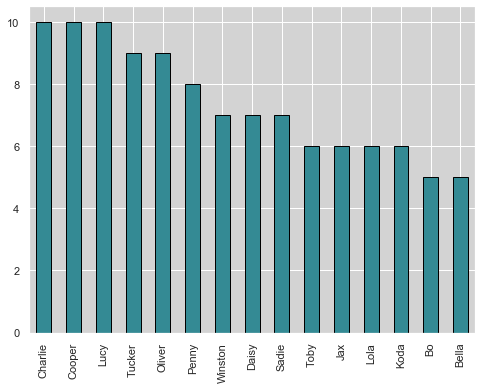

In [112]:
fig, ax = plt.subplots(figsize=(8,6))

names = df['name']
names.value_counts().head(15).plot(kind = 'bar', color = "#348A94", ax = ax, edgecolor = ['Black']*len(names))
ax.set_facecolor('#D3D3D3')
plt.show();

The most often tweeted dognames are Charlie, Lucy, Oliver and Cooper. Other names such as Lola, Daisy and Bella are also qiet popular. This trend corresponds my personal experience as I also consider these names popular among dog owners.

### 5-5- Tweet length per Source

In [113]:
df[['source','num_characters']].groupby('source', as_index = False).mean()

,source,num_characters
0,TweetDeck,115.444444
1,Twitter Web Client,119.500000
2,Twitter for iPhone,110.552294


# 6- Resources

- https://medium.com/analytics-vidhya/introduction-to-data-wrangling-88c1b5e747cb
- https://towardsdatascience.com/data-wrangling-using-pandas-library-ae26f8bbbdd2
- https://www.sciencedirect.com/science/article/pii/S2405896315001986
- https://en.wikipedia.org/wiki/WeRateDogs
- https://github.com/robertgv/Wrangle_and_Analyze_Data/blob/master/wrangle_act.ipynb
- https://github.com/Tesers/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
- https://github.com/Kyungjin-Cho/Udacity-Nanodegree-DataAnalysis-4th/blob/master/wrangle_act.ipynb